In [2]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\himanshu.sharma2\Anaconda3\lib\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading 

# 2. Importing Dataset

In [3]:
data = pd.read_csv(r"C:\IPBA Files\BYOP Files\Sentiment Analysis\Comments Data\Balenciaga_Comments_.csv")

In [4]:
data.head()

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-21T16:26:27Z,thank you for making this and calling them out,47
1,2.0,NaN,0,2023-02-18T01:07:25Z,hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖,258
2,3.0,NaN,0,2023-02-17T22:44:42Z,blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal,213
3,4.0,NaN,0,2023-02-17T04:08:11Z,kids are the one thing we should all agree with dont fuck with kids period,75
4,5.0,NaN,0,2023-02-16T19:05:02Z,i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals,144


In [5]:
data['Comments'] =data['Comments'].astype(str)

The dataset includes columns such as comment number and reply number which are not relevant for our analysis. Hence, we need to remove or drop these columns. Also, limiting the dataset to 1000 to reduce the errors we faced during applying the pretrained model.

In [6]:
data = data[['Comments', 'text_length']][:1000]

In [7]:
data.head()

,Comments,text_length
0,thank you for making this and calling them out,47
1,hi blaire im surprised when you said youre not spiritual and that you dont believe in god because youre a very enlightened soul who is aligned with the truth and thats rare in this world keep up the good work and thank you for supporting jk rowling 💖,258
2,blaire you rock thank you for talking about this issue and for calling out celebrities and the left for being silent about it how on earth fighting pedophilia is a partisan issue it must be everybodys goal,213
3,kids are the one thing we should all agree with dont fuck with kids period,75
4,i always say the most wretched of them all are very similar to the most priviledged of them all when it comes to their greed and lack of morals,144


In [8]:
data.dtypes

Comments       object
text_length     int64
dtype: object

In [9]:
data.shape

(1000, 2)

<AxesSubplot: ylabel='Frequency'>

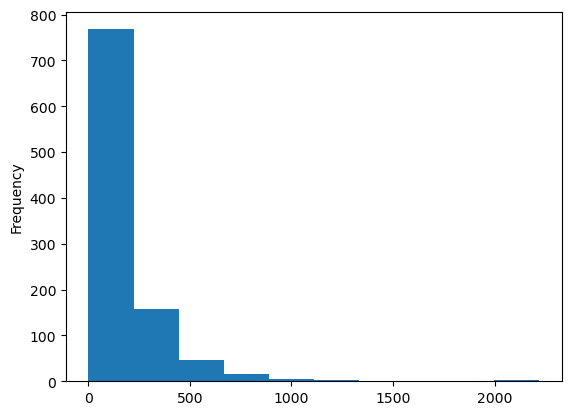

In [10]:
data.loc[:,'text_length'].plot.hist(bins = 10)

# 3. Removing panctuation & converting to lower case

# To write few lines about the code

In [21]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [12]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [13]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [14]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

# 4. Emoticons, Special Char & stopwords

In [15]:
# Get Stopwords
stop = stopwords.words('english')

In [16]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                              [thank, making, calling]
1                            [hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling, 💖]
2                                                                       [blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]
3                                                                                                                                                                   [kids, one, thing, agree, dont, fuck, kids, period]
4                                                                                                                                       

In [17]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [19]:
# Apply the remove_emoticons function to the 'Comments' column
data['Comments'] = data['Comments'].apply(remove_emoticons)

# 5. Lemmatize

In [20]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [22]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

# 6. Tweet Tokenize

In [23]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

# 7. POS Tagging

In [24]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [25]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [26]:
data.head()

,Comments,text_length,Tokens,POS_Tagged
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]"
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]"
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]"
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]"
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]"


# Approach 1) Analysing sentiments through vader

The SentimentIntensityAnalyzer is a pre-trained model that uses a lexicon-based approach to perform sentiment analysis on text.

In [27]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [28]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [29]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124


Let's create labels using the scores we got using vader

In [30]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 627
negative tweets: 373


In [31]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0


Creating labels using the sentiments

In [32]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )


In [33]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative


<AxesSubplot: xlabel='vader_labels', ylabel='count'>

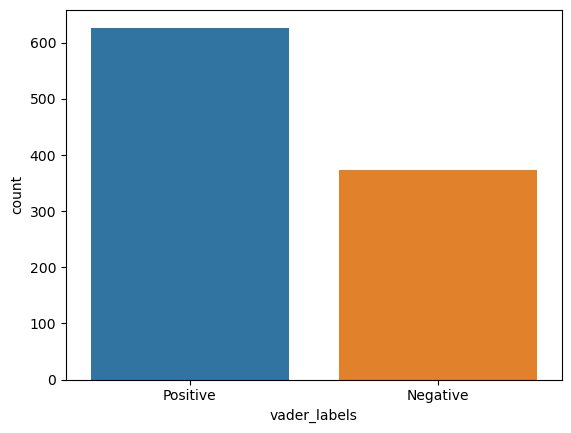

In [35]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


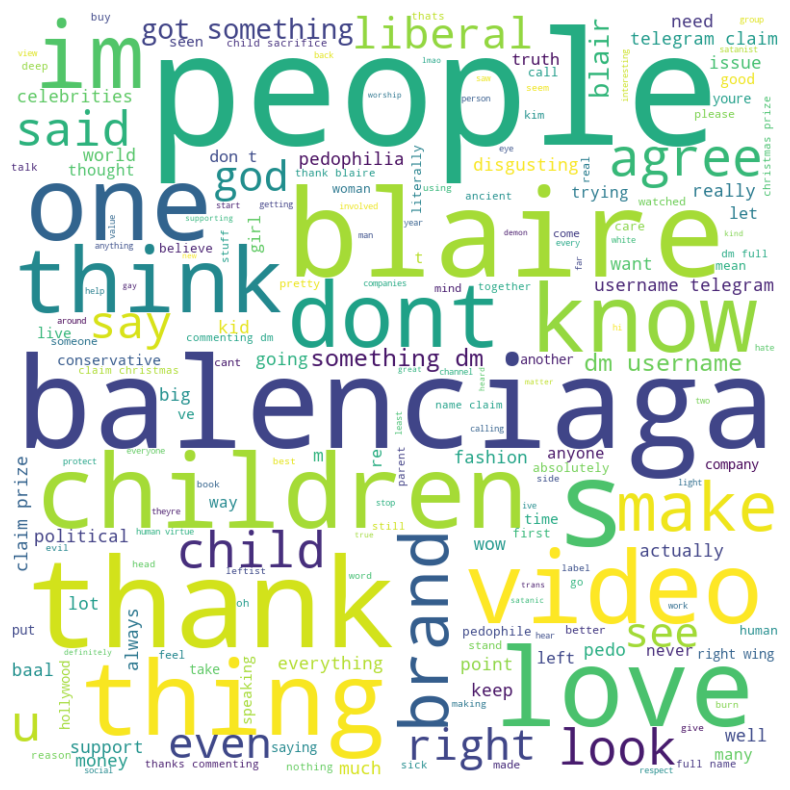

Negative Sentiments


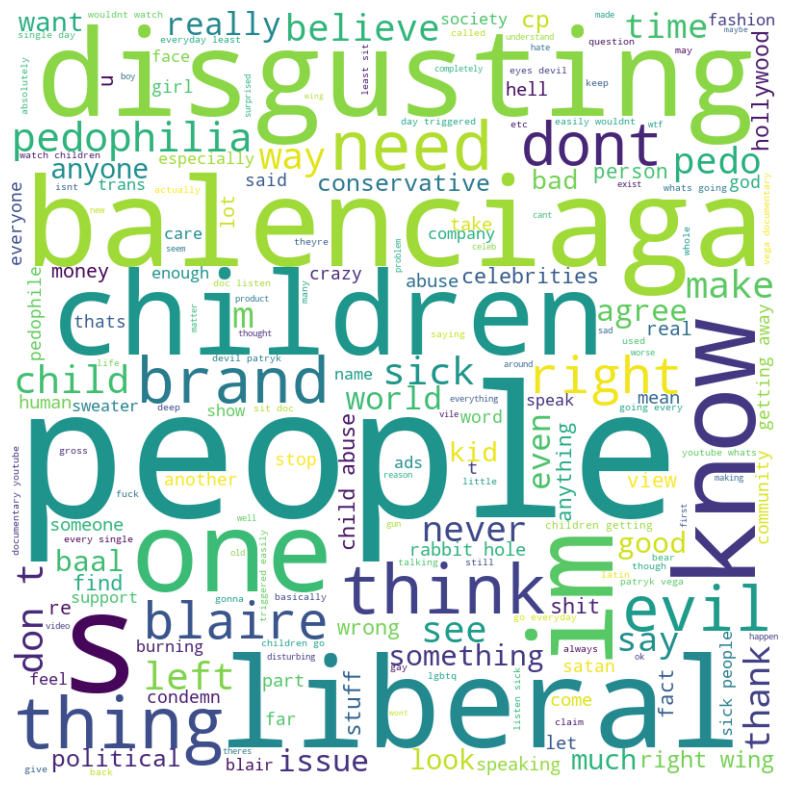

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)


# Approach 2) Analysing sentiments through huggingface transformers

Using Hugging Face Transformers library to create a sentiment analysis model using a pre-trained transformer-based language model. The pipeline function is used to create a pipeline object which contains the pre-trained model and associated tokenizer.

In [39]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [40]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

text = data['Comments'].tolist()[:100]

sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['thank making calling', 'hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling', 'blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal', 'kids one thing agree dont fuck kids period', 'always say wretched similar priviledged comes greed lack morals', 'i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud', 'dont u think people going create brands thing', 'im pretty sure one normal left right lib seditionist name want pedophilia heck woman last thing portugal clergy theme', 'thank content blaire', 'give clothes charity i

In [41]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'POSITIVE', 'score': 0.9998476505279541},
 {'label': 'POSITIVE', 'score': 0.9992151260375977},
 {'label': 'POSITIVE', 'score': 0.9829915165901184},
 {'label': 'NEGATIVE', 'score': 0.8874287009239197},
 {'label': 'NEGATIVE', 'score': 0.9992269277572632},
 {'label': 'NEGATIVE', 'score': 0.9421718120574951},
 {'label': 'NEGATIVE', 'score': 0.9833018183708191},
 {'label': 'NEGATIVE', 'score': 0.9950954914093018},
 {'label': 'POSITIVE', 'score': 0.9998338222503662},
 {'label': 'NEGATIVE', 'score': 0.9923591017723083},
 {'label': 'NEGATIVE', 'score': 0.9982255101203918},
 {'label': 'POSITIVE', 'score': 0.7060955762863159},
 {'label': 'NEGATIVE', 'score': 0.9825385808944702},
 {'label': 'POSITIVE', 'score': 0.999854564666748},
 {'label': 'POSITIVE', 'score': 0.9996826648712158},
 {'label': 'POSITIVE', 'score': 0.999692440032959},
 {'label': 'POSITIVE', 'score': 0.9608718156814575},
 {'label': 'NEGATIVE', 'score': 0.9960849285125732},
 {'label': 'NEGATIVE', 'score': 0.98020064830780

In [42]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [43]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,transformer_score,transformer_labels
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.999848,POSITIVE
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive,0.999215,POSITIVE
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.982992,POSITIVE
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.887429,NEGATIVE
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.999227,NEGATIVE


<AxesSubplot: xlabel='transformer_labels', ylabel='count'>

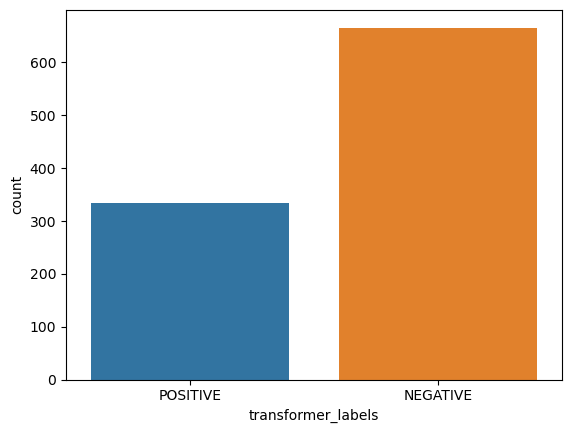

In [45]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


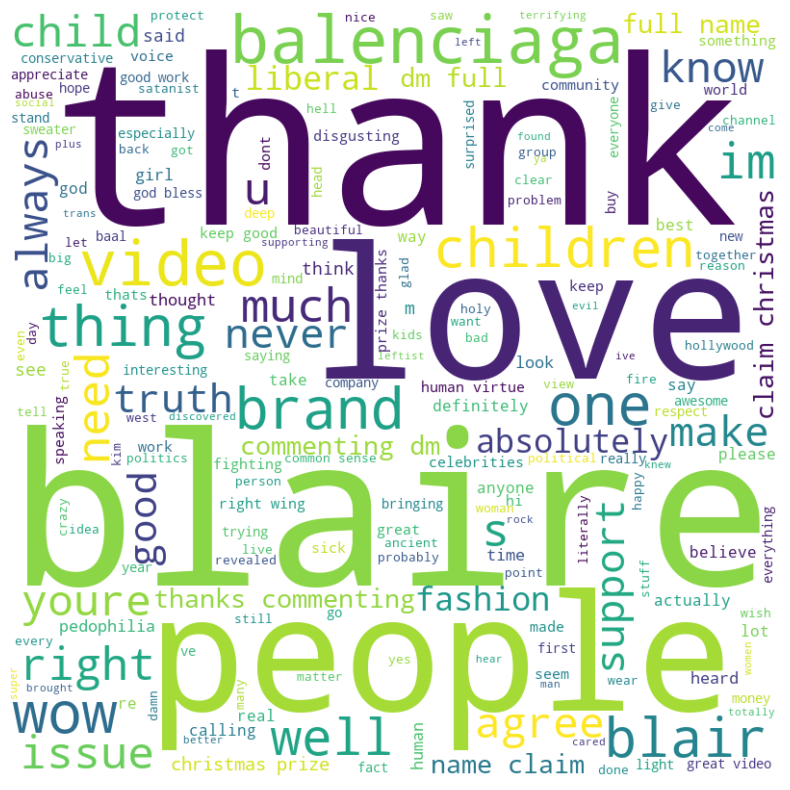

Negative Sentiments


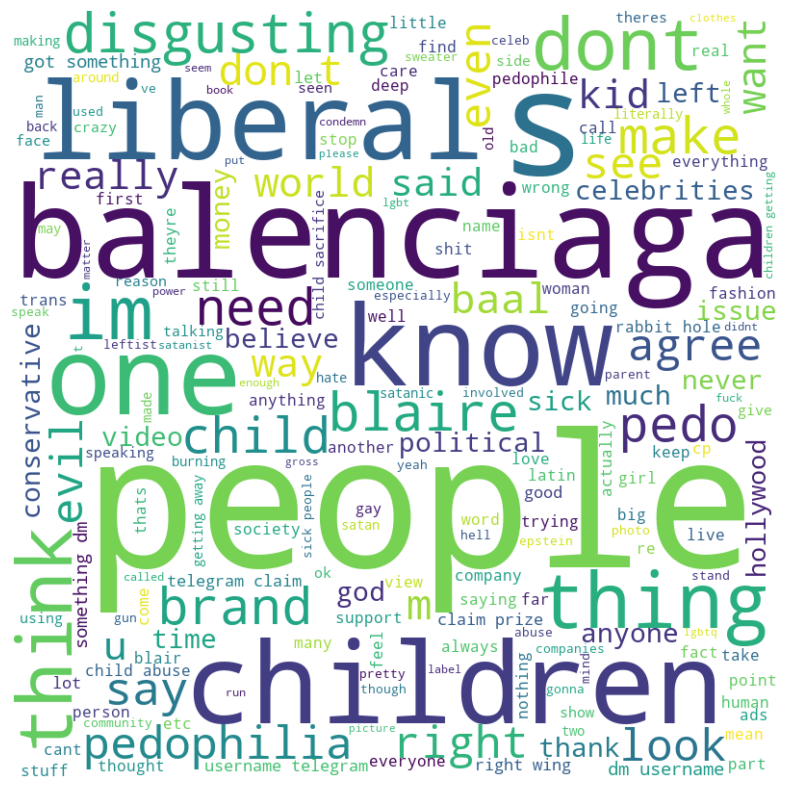

In [46]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'POSITIVE']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'NEGATIVE']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)

print("Negative Sentiments")
generate_wordcloud(negative_tweets)

One observation we can see is that the number of negative sentiments is higher in hugging face compared to sentiment intensity analyser. 

# Approach 3) Analysing sentiments through pretrained roBERTa

In [ ]:
#Write few lines about the code and approach/ Used pretrained model as fine-tuning the model even on a small corpus is throwing RAM errors

In [47]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [51]:
#!transformers-cli cache clear

usage: transformers-cli <command> [<args>]
Transformers CLI tool: error: invalid choice: 'cache' (choose from 'convert', 'download', 'env', 'run', 'serve', 'login', 'whoami', 'logout', 'repo', 'add-new-model', 'add-new-model-like', 'lfs-enable-largefiles', 'lfs-multipart-upload', 'pt-to-tf')


In [48]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [49]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "textattack/roberta-base-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

Some weights of the model checkpoint at textattack/roberta-base-SST-2 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                                                                                                                                                                   Comments  \
0                                                                                                                                                                      thank making calling   
1                             hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                                             blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                                                kids one thing agree dont fuck kids period   
4                                            

# Approach 4) Analysing sentiments using pretrained bert model

In [ ]:
#Write-up about code

In [50]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Initialize the tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'bert_neg' : scores[0][0].item(),  
        'bert_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

                                                                                                                                                                                   Comments  \
0                                                                                                                                                                      thank making calling   
1                             hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling   
2                                                             blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal   
3                                                                                                                                                kids one thing agree dont fuck kids period   
4                                            

In [51]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,transformer_score,transformer_labels,roberta_neg,roberta_pos,bert_neg,bert_pos
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.999848,POSITIVE,0.000846,0.999154,0.550118,0.449882
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive,0.999215,POSITIVE,0.000842,0.999158,0.577652,0.422348
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.982992,POSITIVE,0.929030,0.070971,0.530493,0.469507
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.887429,NEGATIVE,0.845634,0.154366,0.540309,0.459691
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.999227,NEGATIVE,0.995427,0.004572,0.564040,0.435960


We have the scores using both the models, let's create a labels using the scores we got

In [52]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["bert_label"] = data["bert_pos"].apply(get_label)
data["roberta_label"] = data["roberta_pos"].apply(get_label)

In [53]:
data.head()

,Comments,text_length,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,transformer_score,transformer_labels,roberta_neg,roberta_pos,bert_neg,bert_pos,bert_label,roberta_label
0,thank making calling,47,"[thank, making, calling]","[(thank, NN), (making, VBG), (calling, VBG)]",0.3612,1,Positive,0.999848,POSITIVE,0.000846,0.999154,0.550118,0.449882,Negative,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,258,"[hi, blaire, im, surprised, said, youre, spiritual, dont, believe, god, youre, enlightened, soul, aligned, truth, thats, rare, world, keep, good, work, thank, supporting, jk, rowling]","[(hi, NN), (blaire, NN), (im, NN), (surprised, VBD), (said, VBD), (youre, NN), (spiritual, JJ), (dont, NN), (believe, VBP), (god, NN), (youre, NN), (enlightened, VBD), (soul, NN), (aligned, VBN), (truth, NN), (thats, NNS), (rare, VBP), (world, NN), (keep, VB), (good, JJ), (work, NN), (thank, NN), (supporting, VBG), (jk, NN), (rowling, NN)]",0.9298,1,Positive,0.999215,POSITIVE,0.000842,0.999158,0.577652,0.422348,Negative,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,213,"[blaire, rock, thank, talking, issue, calling, celebrities, left, silent, earth, fighting, pedophilia, partisan, issue, must, everybodys, goal]","[(blaire, NN), (rock, NN), (thank, NN), (talking, VBG), (issue, NN), (calling, VBG), (celebrities, NNS), (left, VBD), (silent, JJ), (earth, NN), (fighting, VBG), (pedophilia, JJ), (partisan, JJ), (issue, NN), (must, MD), (everybodys, VB), (goal, NN)]",0.0000,1,Positive,0.982992,POSITIVE,0.929030,0.070971,0.530493,0.469507,Negative,Negative
3,kids one thing agree dont fuck kids period,75,"[kids, one, thing, agree, dont, fuck, kids, period]","[(kids, NNS), (one, CD), (thing, NN), (agree, JJ), (dont, JJ), (fuck, JJ), (kids, NNS), (period, NN)]",0.6542,1,Positive,0.887429,NEGATIVE,0.845634,0.154366,0.540309,0.459691,Negative,Negative
4,always say wretched similar priviledged comes greed lack morals,144,"[always, say, wretched, similar, priviledged, comes, greed, lack, morals]","[(always, RB), (say, VB), (wretched, VBD), (similar, JJ), (priviledged, VBN), (comes, VBZ), (greed, JJ), (lack, NN), (morals, NNS)]",-0.6124,0,Negative,0.999227,NEGATIVE,0.995427,0.004572,0.564040,0.435960,Negative,Negative


Storing them in one seperate dataframe for futher comparison

In [55]:
labels = data[['Comments','vader_labels','transformer_labels','bert_label','roberta_label']]

In [56]:
labels.head()

,Comments,vader_labels,transformer_labels,bert_label,roberta_label
0,thank making calling,Positive,POSITIVE,Negative,Positive
1,hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling,Positive,POSITIVE,Negative,Positive
2,blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal,Positive,POSITIVE,Negative,Negative
3,kids one thing agree dont fuck kids period,Positive,NEGATIVE,Negative,Negative
4,always say wretched similar priviledged comes greed lack morals,Negative,NEGATIVE,Negative,Negative


# Check accuracy and F1 Score

In [60]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['vader_labels']

# Get the labels from approach 1
y_pred_approach_1 = data['transformer_labels']

# Get the labels from approach 2
#y_pred_approach_2 = data['transformer_labels']

# Get the labels from approach 3
y_pred_approach_3 = data['bert_label']

# Get the labels from approach 4
y_pred_approach_4 = data['roberta_label']

# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
#acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
acc_approach_3 = accuracy_score(y_true, y_pred_approach_3)
acc_approach_4 = accuracy_score(y_true, y_pred_approach_4)

# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
#f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
f1_approach_3 = f1_score(y_true, y_pred_approach_3, average='weighted')
f1_approach_4 = f1_score(y_true, y_pred_approach_4, average='weighted')

# Print the results
print("Accuracy for vader_labels: {:.4f}".format(acc_approach_1))
#print("Accuracy for transformer_labels: {:.4f}".format(acc_approach_2))
print("Accuracy for bert_label: {:.4f}".format(acc_approach_3))
print("Accuracy for roberta_label: {:.4f}".format(acc_approach_4))

print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
#print("F1 score for transformer_labels: {:.4f}".format(f1_approach_2))
print("F1 score for bert_label: {:.4f}".format(f1_approach_3))
print("F1 score for roberta_label: {:.4f}".format(f1_approach_4))

Accuracy for vader_labels: 0.0000
Accuracy for bert_label: 0.3750
Accuracy for roberta_label: 0.6750
F1 score for vader_labels: 0.0000
F1 score for bert_label: 0.2154
F1 score for roberta_label: 0.6741


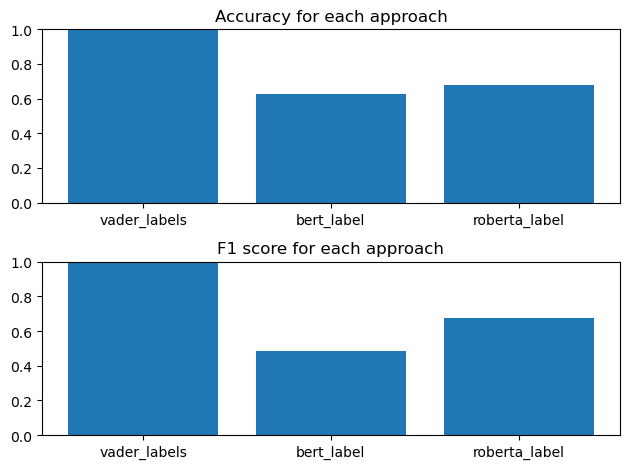

In [59]:
import matplotlib.pyplot as plt

# Define the data
accuracy_data = [1.0, 0.627, 0.676]
f1_score_data = [1.0, 0.4833, 0.6751]
labels = ['vader_labels', 'bert_label', 'roberta_label']

# Create the bar chart for accuracy
plt.subplot(2, 1, 1)
plt.bar(labels, accuracy_data)
plt.title('Accuracy for each approach')
plt.ylim([0, 1])

# Create the bar chart for F1 score
plt.subplot(2, 1, 2)
plt.bar(labels, f1_score_data)
plt.title('F1 score for each approach')
plt.ylim([0, 1])

# Display the chart
plt.tight_layout()
plt.show()


# Conclusion:

Based on the accuracy and F1 scores, we can see that the Vader Labels have a perfect accuracy and F1 score. This suggests that the Vader model was able to accurately predict the sentiment of the comments. However, since these are not actual labels, we cannot compare them to the other models' performance.

For the BERT and RoBERTa models, we can see that RoBERTa outperformed BERT in terms of accuracy and F1 score. Both models have decent accuracy scores, but their F1 scores are lower, which suggests that they may have some difficulty in correctly classifying certain samples.

Overall, based on the scores, we can conclude that the Vader model seems to be performing well in predicting the sentiment of the comments, while the Transformer models may need further fine-tuning to improve their performance.